Trabalhando com Planilhas do Excel

In [1]:
#Importando a Biblioteca
import pandas as pd

In [2]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")


In [3]:
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
188,Salvador,2019-01-02,178.11,1035,3
33,Natal,2018-01-11,759.00,854,2
130,Fortaleza,2019-03-02,12.36,983,4
0,Recife,2019-01-01,162.61,981,1
137,Recife,2019-03-02,51.99,983,3


In [5]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#Alterando o tipo de dado de coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [12]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [13]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


Tratando valores faltantes

In [12]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [14]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [17]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
23,Aracaju,2018-01-01,237.50,1523,7
35,Salvador,2019-01-01,241.45,1037,1
49,Natal,2019-04-01,831.00,852,2
48,Recife,2019-01-01,141.19,980,7
79,Aracaju,2018-01-01,5.59,1521,4
88,Recife,2019-01-01,180.24,980,6
39,Salvador,2019-01-01,165.95,1036,3
220,Salvador,2019-01-02,42.71,1035,1
62,Salvador,2019-01-01,161.02,1037,3
192,Natal,2019-01-02,166.51,1036,1


In [15]:
df["Vendas"].fillna(0, inplace=True)

In [16]:
df.dropna(subset=["Vendas"], inplace=True)

In [17]:
df.dropna(how="all", inplace=True)

Criando colunas novas


In [18]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [20]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [21]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [25]:
#Retornando a maior Receita
df["Receita"].max()

3544.0

In [26]:
#Retornando a menor Receita
df["Receita"].min()

3.34

In [27]:
#nsmallest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [28]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [22]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Trabalhando com datas

In [6]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [8]:
df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID      int64
Qtde        int64
dtype: object

In [9]:
df["Data"] = pd.to_datetime(df["Data"])

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [23]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [24]:
df["Ano_Venda"] = df["Data"].dt.year

In [26]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
82,Salvador,2019-01-01,207.88,1035,1,207.88,1.0,2019
68,Recife,2019-01-01,175.45,980,3,526.35,3.0,2019
33,Aracaju,2018-01-01,35.09,1523,4,140.36,4.0,2018
45,Natal,2019-03-11,431.00,852,3,1293.00,3.0,2019
78,Salvador,2019-01-01,111.20,1036,3,333.60,3.0,2019


In [27]:
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [28]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
72,Aracaju,2018-01-01,168.95,1523,7,1182.65,7.0,2018,1,1
155,Natal,2019-01-02,237.81,1036,3,713.43,3.0,2019,1,2
13,Fortaleza,2019-02-12,118.58,1003,4,474.32,4.0,2019,2,12
225,Salvador,2019-01-02,36.23,1035,1,36.23,1.0,2019,1,2
108,Recife,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2


In [29]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [30]:
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [31]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
183,Natal,2019-01-02,120.23,1037,2,240.46,2.0,2019,1,2,366 days
119,Aracaju,2018-01-01,9.32,1523,6,55.92,6.0,2018,1,1,0 days
82,Fortaleza,2019-01-01,14.03,1004,5,70.15,5.0,2019,1,1,365 days
11,Recife,2019-01-01,202.79,980,5,1013.95,5.0,2019,1,1,365 days
112,Recife,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days


In [32]:
#Criando a coluna de Trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [33]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
239,Salvador,2019-01-03,161.41,1037,3,484.23,3.0,2019,1,3,367 days,1
211,Salvador,2019-01-02,141.05,1035,3,423.15,3.0,2019,1,2,366 days,1
94,Salvador,2019-01-01,33.24,1037,1,33.24,1.0,2019,1,1,365 days,1
205,Salvador,2019-01-02,196.09,1037,1,196.09,1.0,2019,1,2,366 days,1
20,Fortaleza,2019-01-01,39.68,1003,2,79.36,2.0,2019,1,1,365 days,1


In [34]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [35]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


Visualização de Dados


In [38]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

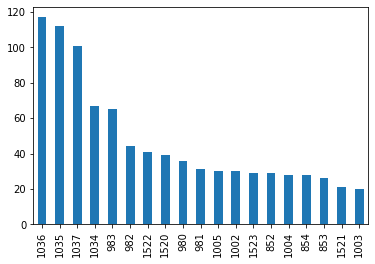

In [39]:

df["LojaID"].value_counts(ascending=False).plot.bar()

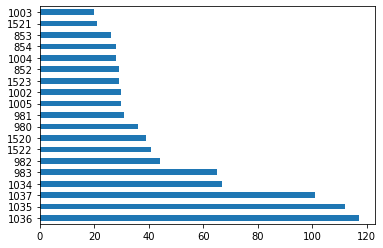

In [40]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

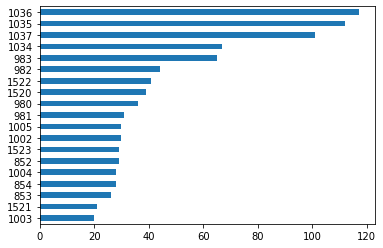

In [41]:
#Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh()

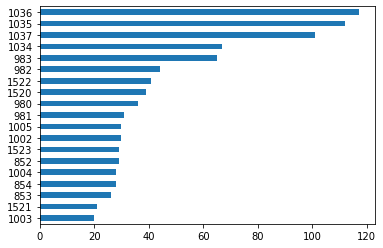

In [42]:
df["LojaID"].value_counts(ascending=True).plot.barh();

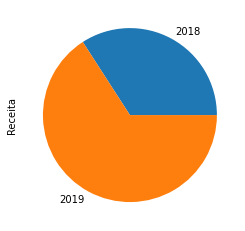

In [43]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [44]:
#Total vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

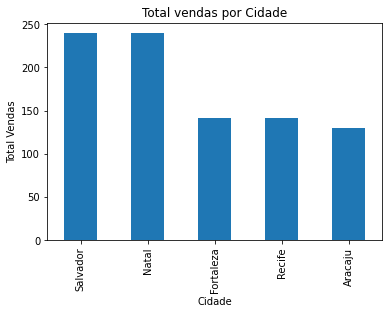

In [46]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

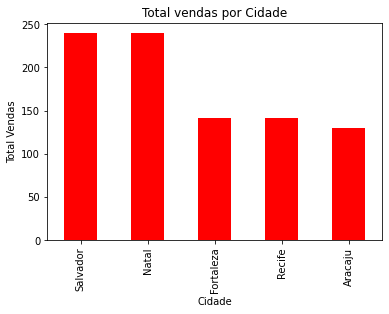

In [47]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [48]:
#Alterando o estilo
plt.style.use("ggplot")

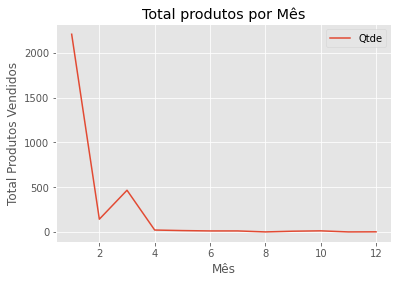

In [51]:
#Total produtos vendidos por Mês
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total produtos por Mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [52]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [53]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

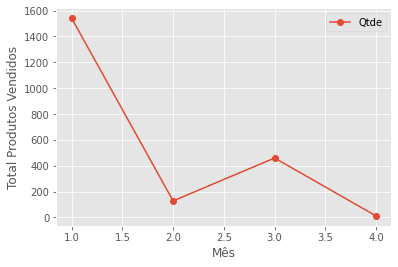

In [55]:
#Total produtos vendidos por Mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [56]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

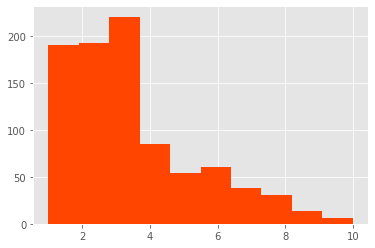

In [57]:
#Histograma
plt.hist(df["Qtde"], color="orangered")

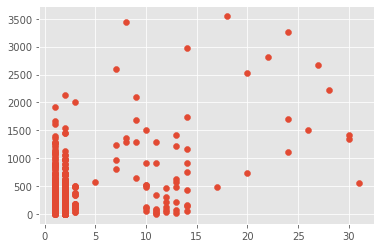

In [58]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

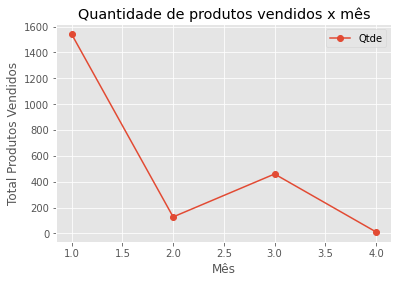

In [59]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();
plt.savefig("grafico QTDExMes.png")